# Predict Calorie Expenditure
# Projet Kaggle — Prédiction Calories Brûlées 🔥



## 1. Compréhension & Exploration des données

### Charger les datasets (train.csv, test.csv)

In [107]:
# 📂 Chargement des données
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# ✅ Copie de sécurité des datasets
train_raw = train.copy()
test_raw = test.copy()

# 📌 Fusion des datasets pour un traitement commun
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], sort=False).reset_index(drop=True)



### Analyse des colonnes (types, valeurs manquantes)

In [64]:
print("✅ Données chargées")

# 👀 Aperçu rapide
print("\n🔹 Aperçu du jeu d'entraînement :")
display(data.head())


print("\n🔹 Valeurs manquantes dans le train :")
print(data.isnull().sum())



✅ Données chargées

🔹 Aperçu du jeu d'entraînement :


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,source
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train



🔹 Valeurs manquantes dans le train :
id                 0
Sex                0
Age                0
Height             0
Weight             0
Duration           0
Heart_Rate         0
Body_Temp          0
Calories      250000
source             0
dtype: int64


### Statistiques descriptives (moyenne, médiane, écart-type…)

In [62]:
print("\n🔹 Statistiques descriptives :")
display(data.describe())


🔹 Statistiques descriptives :


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Duration_per_Kg,HR_per_Age,Temp_Effort_Combo,HR_to_Temp_Ratio,Intensity,IMC,Effort_Temp,Age_Adjusted_Intensity
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,750000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,41.428419,174.704670,75.146179,15.419618,95.482767,40.036213,88.282781,0.212990,2.649775,3828.629977,2.382125,1541.399397,24.373046,0.381572,42.684314
std,288675.278932,15.175728,12.823881,13.981899,8.352851,9.449920,0.779518,62.395349,0.124303,1.043465,437.929882,0.201462,932.373117,1.511426,0.202999,31.915289
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000,0.008772,0.848101,2485.700000,1.679198,67.000000,12.375937,0.025641,0.923077
25%,249999.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000,0.109375,1.803922,3497.400000,2.233503,728.000000,23.255019,0.202532,17.278481
50%,499999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000,0.203390,2.400000,3838.000000,2.375979,1445.000000,24.386526,0.374065,36.266667
75%,749999.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000,0.303797,3.344828,4171.500000,2.530713,2323.000000,25.484765,0.563725,59.400000
max,999999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,0.714286,6.400000,5286.400000,3.262599,3840.000000,46.443986,0.779221,192.000000


### Visualisations univariées (histogrammes, boxplots verticaux pour détecter outliers)



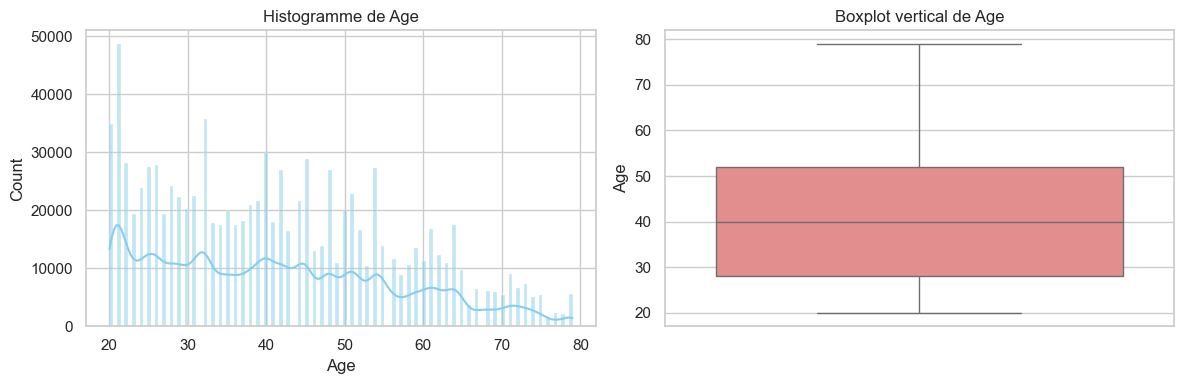

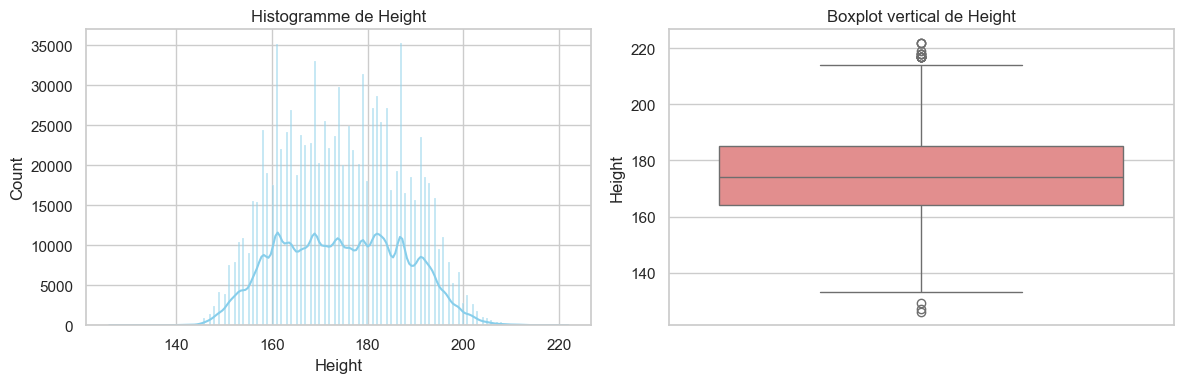

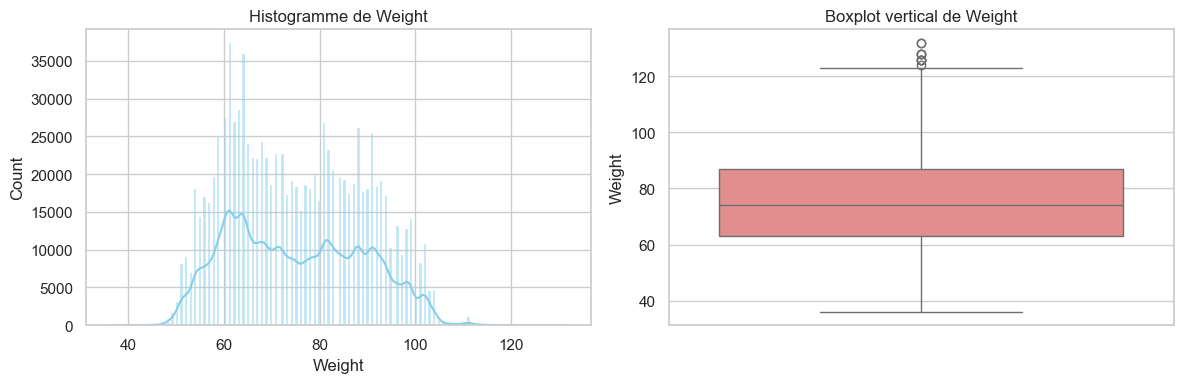

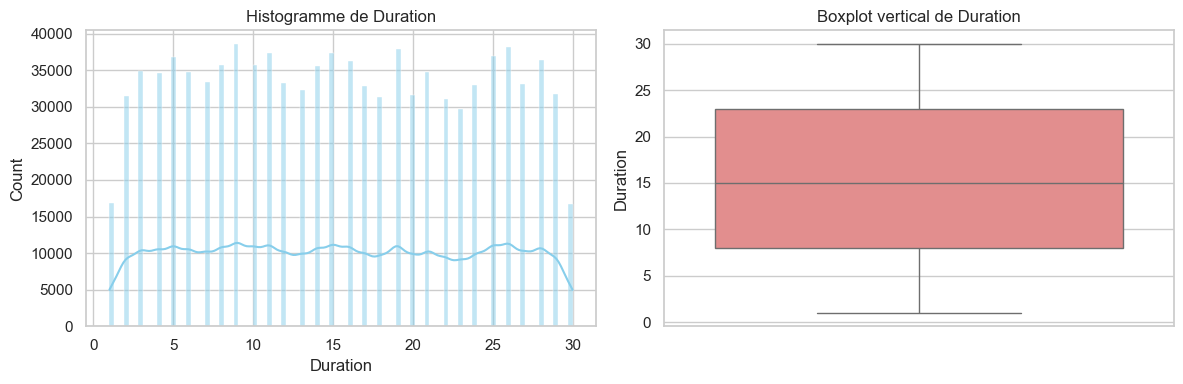

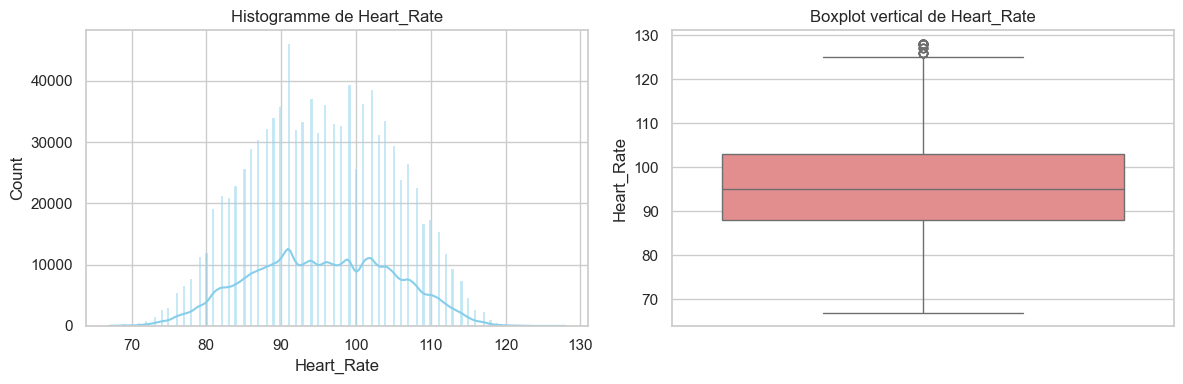

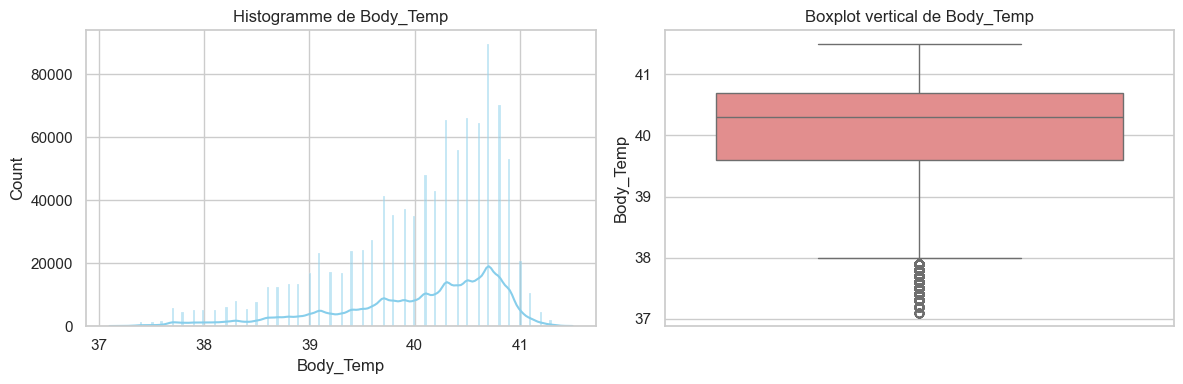

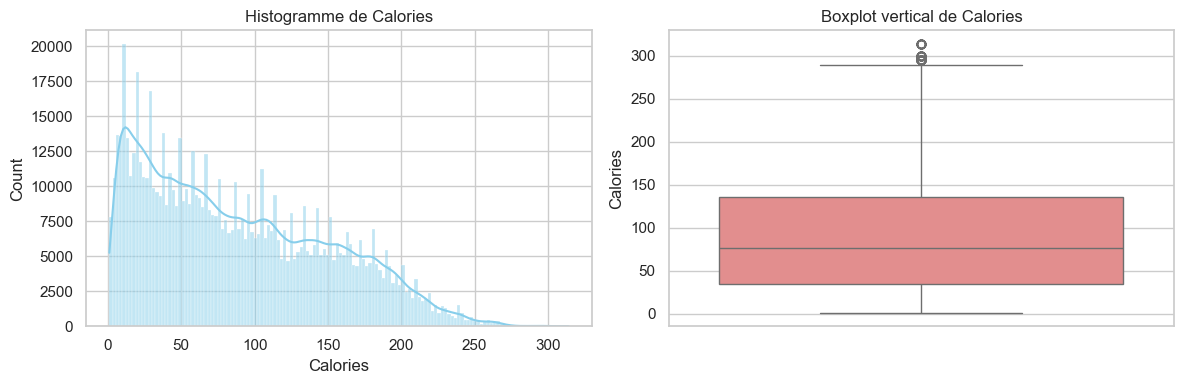

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage plus propre
sns.set(style="whitegrid")

# Colonnes à exclure
exclude_cols = ['source', 'id']

# Colonnes numériques à garder (en excluant celles qu'on ne veut pas)
numeric_cols = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]

for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Histogramme de {col}')
    
    # Boxplot vertical
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Boxplot vertical de {col}')
    
    plt.tight_layout()
    plt.show()

### Visualisations bivariées (corrélations, scatter plots, heatmap)

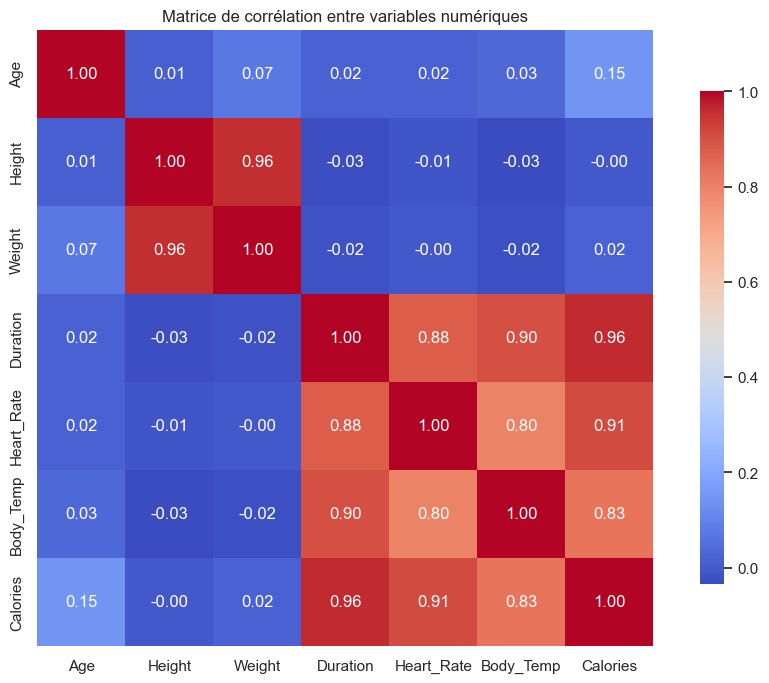

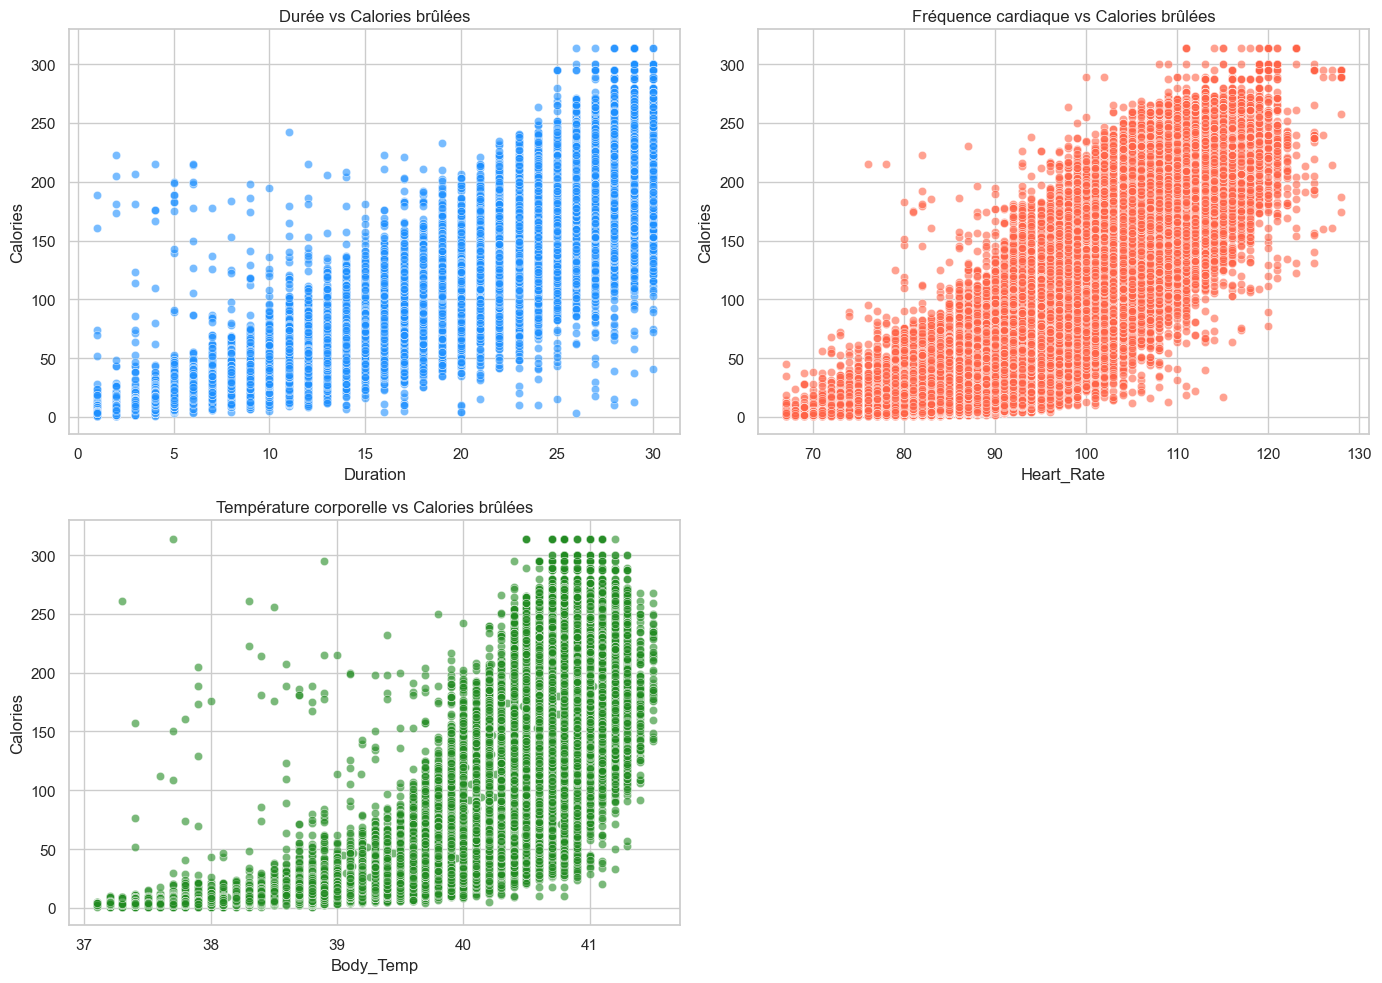

In [39]:
# Calcul de la matrice de corrélation
corr_matrix = data[numeric_cols].corr()

# Heatmap de la corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation entre variables numériques')
plt.show()




# Scatter plots ciblés : ex Duration vs Calories, Heart_Rate vs Calories
plt.figure(figsize=(14, 10))

# 1er plot
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='Duration', y='Calories', alpha=0.6, color='dodgerblue')
plt.title('Durée vs Calories brûlées')

# 2e plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='Heart_Rate', y='Calories', alpha=0.6, color='tomato')
plt.title('Fréquence cardiaque vs Calories brûlées')

# 3e plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Body_Temp', y='Calories', alpha=0.6, color='forestgreen')
plt.title('Température corporelle vs Calories brûlées')

plt.tight_layout()
plt.show()

## 2. Préparation des données

### Nettoyage des données (gestion des valeurs manquantes et outliers)

Analyse rapide des variables numériques

- **Age**  
  Plage cohérente entre 20 et 79 ans, distribution normale sans outliers majeurs.  
  Écart-type modéré (15.18), données plausibles pour un échantillon sportif.

- **Height (cm)**  
  Variations de 126 cm à 222 cm, avec une moyenne autour de 175 cm.  
  Quelques valeurs très grandes mais possibles (grands sportifs). Peu d’outliers suspects.

- **Weight (kg)**  
  Étendue de 36 kg à 132 kg, moyenne proche de 75 kg.  
  Certaines valeurs élevées mais dans une fourchette plausible. Surveiller les extrêmes.

- **Duration (min)**  
  Durées très variables, de 1 à 30 minutes, avec une moyenne vers 15 min.  
  Durée minimale très courte (1 min) pouvant représenter un outlier ou entraînement rapide.

- **Heart_Rate (bpm)**  
  Large plage entre 67 et 128 bpm, écart-type élevé.  
  Certaines valeurs extrêmes potentiellement erronées, à vérifier.

- **Body_Temp (°C)**  
  Valeurs très serrées entre 37.1 et 41.5°C, moyenne proche de 40°C.  
  Distribution stable, peu d’outliers attendus.

- **Calories**  
  Large variation, de 1 à 314 calories brûlées, avec une moyenne autour de 88 calories.  
  Données cohérentes avec la variabilité des entraînements.




### Création de nouvelles features (feature engineering)


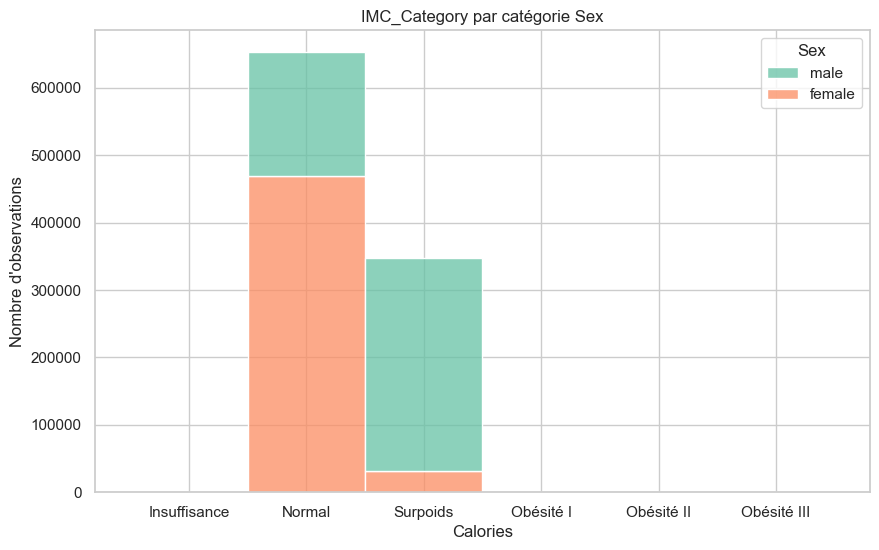

In [108]:

# 1. Durée d'entraînement par kg : effort proportionnel au poids
data['Duration_per_Kg'] = data['Duration'] / data['Weight']

# 2. Intensité relative à l’âge (plus la valeur est haute, plus c’est intense pour l’âge)
data['HR_per_Age'] = data['Heart_Rate'] / data['Age']

# 3. Combo température × fréquence cardiaque : stress cardio + thermique
data['Temp_Effort_Combo'] = data['Body_Temp'] * data['Heart_Rate']

# 4. Ratio Heart Rate / Température : réponse cardiovasculaire vs thermorégulation
data['HR_to_Temp_Ratio'] = data['Heart_Rate'] / data['Body_Temp']

# Intensité brute de l’effort : durée × fréquence cardiaque
# Plus la séance est longue et intense, plus elle est énergivore
data['Intensity'] = data['Duration'] * data['Heart_Rate']

# Indice de Masse Corporelle (IMC) = poids (kg) / taille² (m²)
# Sert à estimer la masse grasse, qui peut influencer la dépense énergétique
data['IMC'] = data['Weight'] / ((data['Height'] / 100) ** 2)

# Effort par degré de température corporelle
# Si quelqu’un a un corps très chaud après un petit effort, ça peut signifier un effort plus intense thermiquement
data['Effort_Temp'] = data['Duration'] / data['Body_Temp']

# Intensité ajustée à l’âge
# On considère que l’intensité d’un même effort est perçue plus difficile avec l’âge, donc ça pondère l’effort par l’âge
data['Age_Adjusted_Intensity'] = (data['Duration'] * data['Heart_Rate']) / data['Age']


bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['Insuffisance', 'Normal', 'Surpoids', 'Obésité I', 'Obésité II', 'Obésité III']

data['IMC_Category'] = pd.cut(data['IMC'], bins=bins, labels=labels, right=False)


# Création de variables indicatrices (one-hot encoding) 
IMC_Category_dummies = pd.get_dummies(data.IMC_Category, prefix="IMC_Category")
Sex_dummies = pd.get_dummies(data.Sex, prefix="Sex")



plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='IMC_Category', hue='Sex', multiple='stack', palette='Set2', bins=30)
plt.title('IMC_Category par catégorie Sex')
plt.xlabel('Calories')
plt.ylabel('Nombre d\'observations')
plt.show()






In [109]:
data.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'source', 'Duration_per_Kg', 'HR_per_Age',
       'Temp_Effort_Combo', 'HR_to_Temp_Ratio', 'Intensity', 'IMC',
       'Effort_Temp', 'Age_Adjusted_Intensity', 'IMC_Category'],
      dtype='object')

### Standardisation des variables

In [110]:
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['Calories', 'id','source','IMC_Category','Sex'])
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled = pd.concat([data_scaled, IMC_Category_dummies,Sex_dummies], axis=1)
data_scaled[['Calories', 'source', 'id']] = data[['Calories', 'source', 'id']]  # on réintègre la cible
data_scaled.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Duration_per_Kg', 'HR_per_Age', 'Temp_Effort_Combo',
       'HR_to_Temp_Ratio', 'Intensity', 'IMC', 'Effort_Temp',
       'Age_Adjusted_Intensity', 'IMC_Category_Insuffisance',
       'IMC_Category_Normal', 'IMC_Category_Surpoids',
       'IMC_Category_Obésité I', 'IMC_Category_Obésité II',
       'IMC_Category_Obésité III', 'Sex_female', 'Sex_male', 'Calories',
       'source', 'id'],
      dtype='object')

In [111]:
data_scaled.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Duration_per_Kg,HR_per_Age,Temp_Effort_Combo,HR_to_Temp_Ratio,...,IMC_Category_Normal,IMC_Category_Surpoids,IMC_Category_Obésité I,IMC_Category_Obésité II,IMC_Category_Obésité III,Sex_female,Sex_male,Calories,source,id
0,-0.357704,1.114743,0.490193,1.266680,0.583839,1.236390,0.837339,0.149292,0.713288,0.403496,...,True,False,False,False,False,False,True,150.0,train,0
1,1.487348,-0.912725,-1.083271,-0.888274,-1.109297,-0.431309,-0.640828,-1.266598,-1.036993,-1.196590,...,True,False,False,False,False,True,False,34.0,train,1
2,0.630717,-1.068684,-0.797187,-1.007994,-1.215119,-0.303025,-0.833570,-0.960949,-1.108466,-1.348009,...,True,False,False,False,False,True,False,29.0,train,2
3,-1.412020,1.348682,1.062361,1.146960,1.007124,0.851536,0.521212,2.491915,1.015848,0.981461,...,True,False,False,False,False,False,True,140.0,train,3
4,-0.225915,-0.678786,-1.011750,1.146960,0.689660,0.723251,1.583606,0.033001,0.713745,0.646225,...,True,False,False,False,False,True,False,146.0,train,4


### Séparation features / target (Calories)

In [113]:
# Séparation train / test selon la colonne 'source'
train_data = data_scaled[data_scaled['source'] == 'train'].copy()
test_data = data_scaled[data_scaled['source'] == 'test'].copy()

# Séparation features / target
X_train = train_data.drop(columns=['Calories', 'id', 'source'])
y_train = train_data['Calories']

X_test = test_data.drop(columns=['Calories', 'id', 'source'])


## Modélisation de base

In [123]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor

# Fonction RMSLE custom
def rmsle(y_true, y_pred):
    # Clamp valeurs négatives pour éviter erreurs
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))

# Création d’un scorer compatible sklearn (à minimiser)
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Dataset (exemple ici avec Intensity)
X = X_train
y = y_train 


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=kf,
                           scoring=rmsle_scorer,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best RMSLE score: ", -grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
Best RMSLE score:  0.06218854122828162


In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error

# Meilleurs hyperparamètres trouvés
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'subsample': 1.0
}

# Initialisation du modèle
final_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# Entraînement sur tout le training set
final_model.fit(X, y)

# Évaluation sur le training set
y_pred_train = final_model.predict(X)
y_pred_train = np.maximum(0, y_pred_train)  # Clamp valeurs négatives

# Calcul du RMSLE
train_rmsle = rmsle(y, y_pred_train)
print(f"✅ RMSLE sur le training set : {train_rmsle:.5f}")

# Prédictions sur le test set
y_pred_test = final_model.predict(X_test)
y_pred_test = np.maximum(0, y_pred_test)  # Clamp pour la cohérence

# Création du DataFrame pour la soumission
submission = pd.DataFrame({
    'id': test_data['id'],
    'Calories': y_pred_test
})

# Export CSV
submission.to_csv('submission.csv', index=False)
print("📦 Fichier 'submission.csv' exporté avec succès.")

✅ RMSLE sur le training set : 0.05907
📏 RMSE sur le training set   : 3.33
📦 Fichier 'submission.csv' exporté avec succès.
